## Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # set the default Seaborn style for graphics

## Plotly Imports

In [2]:
import matplotlib.ticker as ticker
import json
import plotly.express as px

## Import the Dataset

Note: resale-flat-prices-based-on-approval-date-2000-feb-2012 is being split into two due to exceeding the size limit for Github.
- resale-flat-prices-based-on-approval-date-2000-feb-2005.csv
- resale-flat-prices-based-on-approval-date-2006-2012.csv

In [3]:
df_1990 = pd.read_csv('Resale Flat Prices/resale-flat-prices-based-on-approval-date-1990-1999.csv')
df_2000 = pd.read_csv('Resale Flat Prices/resale-flat-prices-based-on-approval-date-2000-feb-2005.csv')
df_2006 = pd.read_csv('Resale Flat Prices/resale-flat-prices-based-on-approval-date-2006-2012.csv')
df_2012 = pd.read_csv('Resale Flat Prices/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
df_2015 = pd.read_csv('Resale Flat Prices/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
df_2017 = pd.read_csv('Resale Flat Prices/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

In [4]:
df_main = pd.concat([df_1990, df_2000, df_2006, df_2012, df_2015, df_2017])
df_main = df_main.reset_index(drop=True)

## Check out the Data

In [5]:
df_main.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [6]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867784 entries, 0 to 867783
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                867784 non-null  object 
 1   town                 867784 non-null  object 
 2   flat_type            867784 non-null  object 
 3   block                867784 non-null  object 
 4   street_name          867784 non-null  object 
 5   storey_range         867784 non-null  object 
 6   floor_area_sqm       867784 non-null  float64
 7   flat_model           867784 non-null  object 
 8   lease_commence_date  867784 non-null  int64  
 9   resale_price         867784 non-null  float64
 10  remaining_lease      158734 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 72.8+ MB


In [7]:
df_main.nunique()

month                   387
town                     27
flat_type                 8
block                  2578
street_name             577
storey_range             25
floor_area_sqm          209
flat_model               33
lease_commence_date      54
resale_price           8855
remaining_lease         698
dtype: int64

In [8]:
df_main.month.unique()

array(['1990-01', '1990-02', '1990-03', '1990-04', '1990-05', '1990-06',
       '1990-07', '1990-08', '1990-09', '1990-10', '1990-11', '1990-12',
       '1991-01', '1991-02', '1991-03', '1991-04', '1991-05', '1991-06',
       '1991-07', '1991-08', '1991-09', '1991-10', '1991-11', '1991-12',
       '1992-01', '1992-02', '1992-03', '1992-04', '1992-05', '1992-06',
       '1992-07', '1992-08', '1992-09', '1992-10', '1992-11', '1992-12',
       '1993-01', '1993-02', '1993-03', '1993-04', '1993-05', '1993-06',
       '1993-07', '1993-08', '1993-09', '1993-10', '1993-11', '1993-12',
       '1994-01', '1994-02', '1994-03', '1994-04', '1994-05', '1994-06',
       '1994-07', '1994-08', '1994-09', '1994-10', '1994-11', '1994-12',
       '1995-01', '1995-02', '1995-03', '1995-04', '1995-05', '1995-06',
       '1995-07', '1995-08', '1995-09', '1995-10', '1995-11', '1995-12',
       '1996-01', '1996-02', '1996-03', '1996-04', '1996-05', '1996-06',
       '1996-07', '1996-08', '1996-09', '1996-10', 

In [9]:
df_main.town.unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [10]:
df_main.flat_type.unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [11]:
df_main.storey_range.unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [12]:
df_main.flat_model.unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft'], dtype=object)

In [13]:
df_main.remaining_lease.unique()

array([nan, 70, 65, 64, 63, 62, 69, 60, 61, 86, 77, 80, 90, 87, 66, 58,
       94, 71, 68, 84, 73, 79, 76, 72, 82, 74, 67, 88, 81, 89, 53, 54, 55,
       57, 93, 83, 85, 92, 91, 59, 95, 52, 51, 56, 75, 96, 78, 50, 97, 49,
       48, '61 years 04 months', '60 years 07 months',
       '62 years 05 months', '62 years 01 month', '63 years',
       '61 years 06 months', '58 years 04 months', '59 years 08 months',
       '59 years 06 months', '60 years', '62 years 08 months', '61 years',
       '60 years 10 months', '59 years 03 months', '61 years 05 months',
       '60 years 04 months', '62 years', '60 years 03 months',
       '63 years 09 months', '61 years 01 month', '61 years 10 months',
       '58 years 06 months', '59 years 04 months', '62 years 11 months',
       '60 years 08 months', '93 years 08 months', '93 years 07 months',
       '60 years 01 month', '94 years 08 months', '78 years 04 months',
       '60 years 06 months', '62 years 06 months', '58 years',
       '70 years 08 mont

# Data Cleaning

In [14]:
df_main

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
867779,2022-03,YISHUN,5 ROOM,501B,YISHUN ST 51,07 TO 09,112.0,Improved,2018,652000.0,94 years 11 months
867780,2022-03,YISHUN,5 ROOM,820,YISHUN ST 81,07 TO 09,122.0,Improved,1988,585000.0,65 years 06 months
867781,2022-03,YISHUN,EXECUTIVE,359,YISHUN RING RD,01 TO 03,145.0,Apartment,1988,682000.0,65 years 05 months
867782,2022-03,YISHUN,EXECUTIVE,387,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,720000.0,65 years 04 months


In [15]:
# Region 

df_main['town'] = df_main['town'].replace(['ANG MO KIO'],'NORTH-EAST REGION')
df_main['town'] = df_main['town'].replace(['BEDOK'],'EAST REGION')
df_main['town'] = df_main['town'].replace(['BISHAN'],'CENTRAL REGION')
df_main['town'] = df_main['town'].replace(['BUKIT BATOK'],'WEST REGION')
df_main['town'] = df_main['town'].replace(['BUKIT MERAH'],'CENTRAL REGION')
df_main['town'] = df_main['town'].replace(['BUKIT TIMAH'],'CENTRAL REGION')
df_main['town'] = df_main['town'].replace(['CENTRAL AREA'],'CENTRAL REGION')
df_main['town'] = df_main['town'].replace(['CHOA CHU KANG'],'WEST REGION')
df_main['town'] = df_main['town'].replace(['CLEMENTI'],'WEST REGION')
df_main['town'] = df_main['town'].replace(['GEYLANG'],'CENTRAL REGION')
df_main['town'] = df_main['town'].replace(['HOUGANG'],'NORTH-EAST REGION')
df_main['town'] = df_main['town'].replace(['JURONG EAST'],'WEST REGION')
df_main['town'] = df_main['town'].replace(['JURONG WEST'],'WEST REGION')
df_main['town'] = df_main['town'].replace(['KALLANG/WHAMPOA'],'CENTRAL REGION')
df_main['town'] = df_main['town'].replace(['MARINE PARADE'],'CENTRAL REGION')
df_main['town'] = df_main['town'].replace(['QUEENSTOWN'],'CENTRAL REGION')
df_main['town'] = df_main['town'].replace(['SENGKANG'],'NORTH-EAST REGION')
df_main['town'] = df_main['town'].replace(['SERANGOON'],'NORTH-EAST REGION')
df_main['town'] = df_main['town'].replace(['TAMPINES'],'EAST REGION')
df_main['town'] = df_main['town'].replace(['TOA PAYOH'],'CENTRAL REGION')
df_main['town'] = df_main['town'].replace(['WOODLANDS'],'NORTH REGION')
df_main['town'] = df_main['town'].replace(['YISHUN'],'NORTH REGION')
df_main['town'] = df_main['town'].replace(['LIM CHU KANG'],'NORTH REGION')
df_main['town'] = df_main['town'].replace(['SEMBAWANG'],'NORTH REGION')
df_main['town'] = df_main['town'].replace(['BUKIT PANJANG'],'WEST REGION')
df_main['town'] = df_main['town'].replace(['PASIR RIS'],'EAST REGION')
df_main['town'] = df_main['town'].replace(['PUNGGOL'],'NORTH-EAST REGION')

In [16]:
# Storey Range

df_main['storey_range'] = df_main['storey_range'].replace(['10 TO 12'],'01 TO 15')
df_main['storey_range'] = df_main['storey_range'].replace(['04 TO 06'],'01 TO 15')
df_main['storey_range'] = df_main['storey_range'].replace(['07 TO 09'],'01 TO 15')
df_main['storey_range'] = df_main['storey_range'].replace(['01 TO 03'],'01 TO 15')
df_main['storey_range'] = df_main['storey_range'].replace(['13 TO 15'],'01 TO 15')
df_main['storey_range'] = df_main['storey_range'].replace(['19 TO 21'],'16 TO 30')
df_main['storey_range'] = df_main['storey_range'].replace(['16 TO 18'],'16 TO 30')
df_main['storey_range'] = df_main['storey_range'].replace(['25 TO 27'],'16 TO 30')
df_main['storey_range'] = df_main['storey_range'].replace(['22 TO 24'],'16 TO 30')
df_main['storey_range'] = df_main['storey_range'].replace(['28 TO 30'],'16 TO 30')
df_main['storey_range'] = df_main['storey_range'].replace(['31 TO 33'],'16 TO 30')
df_main['storey_range'] = df_main['storey_range'].replace(['40 TO 42'],'31 TO 45')
df_main['storey_range'] = df_main['storey_range'].replace(['37 TO 39'],'31 TO 45')
df_main['storey_range'] = df_main['storey_range'].replace(['34 TO 36'],'31 TO 45')
df_main['storey_range'] = df_main['storey_range'].replace(['06 TO 10'],'01 TO 15')
df_main['storey_range'] = df_main['storey_range'].replace(['01 TO 05'],'01 TO 15')
df_main['storey_range'] = df_main['storey_range'].replace(['11 TO 15'],'01 TO 15')
df_main['storey_range'] = df_main['storey_range'].replace(['16 TO 20'],'16 TO 30')
df_main['storey_range'] = df_main['storey_range'].replace(['21 TO 25'],'16 TO 30')
df_main['storey_range'] = df_main['storey_range'].replace(['26 TO 30'],'16 TO 30')
df_main['storey_range'] = df_main['storey_range'].replace(['36 TO 40'],'31 TO 45')
df_main['storey_range'] = df_main['storey_range'].replace(['31 TO 35'],'31 TO 45')
df_main['storey_range'] = df_main['storey_range'].replace(['46 TO 48'],'31 TO 45')
df_main['storey_range'] = df_main['storey_range'].replace(['43 TO 45'],'31 TO 45')
df_main['storey_range'] = df_main['storey_range'].replace(['49 TO 51'],'31 TO 45')

In [17]:
# Splitting month into Month and Year

df_main[['Year', 'Month']] = df_main['month'].str.split('-', expand=True) 

In [18]:
# Lease Commence Date

df_main['Year'] = df_main['Year'].astype(str).astype(int) 

df_main['lease_left']=(99 - (df_main['Year'] - df_main['lease_commence_date'])) 

Flat differences

Multi generation flat:
- Current - 3 rooms (2 master room, 1 normal room) [excluding living room]
- Previous (1980s) - 4-room or 5-room flat with an adjoining studio apartment that had a separate entrance

In [19]:
# Replacing MULTI-GENERATION TO MULTI GENERATION

df_main['flat_type'] = df_main['flat_type'].replace(['MULTI-GENERATION'],'MULTI GENERATION')

Type S1 and S2: (i.e. The Pinnacle@Duxton)
- Special types, different unit variations – with dissimilar combinations of features such as extended bays, balconies, bay windows and planter areas.

All the different models (Improved, Simplified etc):
- Refers to the different model of each flat types, normally means floor plan is different, but all means the same type.

Adjoined flat are 2 individual flats purchased side by side, and the owners link both units together.

Loft apartment is flats with high ceiling, 1 staircase and 1 room on the top, normally located at the top of the building (something like penthouse but HDB version)

Comparison between following models:
- Apartment (1-level)
- Maisonette (2-level, normally multiple units in 1 HDB building)
- Terrace (2-levels, but a stand-alone building)

In [20]:
# Flat Model

df_main['flat_model'] = df_main['flat_model'].replace(['MODEL A-MAISONETTE','IMPROVED-MAISONETTE',
                                                       'Model A-Maisonette','Improved-Maisonette', 
                                                       'Premium Maisonette', 'Maisonette'],
                                                       'MAISONETTE')
df_main['flat_model'] = df_main['flat_model'].replace(['PREMIUM APARTMENT','Apartment','Premium Apartment'],
                                                       'APARTMENT')
df_main['flat_model'] = df_main['flat_model'].replace(['Improved'],'IMPROVED')
df_main['flat_model'] = df_main['flat_model'].replace(['New Generation'],'NEW GENERATION')
df_main['flat_model'] = df_main['flat_model'].replace(['Model A'],'MODEL A')
df_main['flat_model'] = df_main['flat_model'].replace(['Standard'],'STANDARD')
df_main['flat_model'] = df_main['flat_model'].replace(['Simplified'],'SIMPLIFIED')
df_main['flat_model'] = df_main['flat_model'].replace(['2-room','Model A2'],'2-ROOM')
df_main['flat_model'] = df_main['flat_model'].replace(['Terrace'],'TERRACE')
df_main['flat_model'] = df_main['flat_model'].replace(['Multi Generation'],'MULTI GENERATION')
df_main['flat_model'] = df_main['flat_model'].replace(['Adjoined flat'],'ADJOINED FLAT')
df_main['flat_model'] = df_main['flat_model'].replace(['Type S1', 'Type S2'],'TYPE S')
df_main['flat_model'] = df_main['flat_model'].replace(['Premium Apartment Loft'],'LOFT APARTMENT')

In [21]:
df_main

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,Year,Month,lease_left
0,1990-01,NORTH-EAST REGION,1 ROOM,309,ANG MO KIO AVE 1,01 TO 15,31.0,IMPROVED,1977,9000.0,NaN,1990,01,86
1,1990-01,NORTH-EAST REGION,1 ROOM,309,ANG MO KIO AVE 1,01 TO 15,31.0,IMPROVED,1977,6000.0,NaN,1990,01,86
2,1990-01,NORTH-EAST REGION,1 ROOM,309,ANG MO KIO AVE 1,01 TO 15,31.0,IMPROVED,1977,8000.0,NaN,1990,01,86
3,1990-01,NORTH-EAST REGION,1 ROOM,309,ANG MO KIO AVE 1,01 TO 15,31.0,IMPROVED,1977,6000.0,NaN,1990,01,86
4,1990-01,NORTH-EAST REGION,3 ROOM,216,ANG MO KIO AVE 1,01 TO 15,73.0,NEW GENERATION,1976,47200.0,NaN,1990,01,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867779,2022-03,NORTH REGION,5 ROOM,501B,YISHUN ST 51,01 TO 15,112.0,IMPROVED,2018,652000.0,94 years 11 months,2022,03,95
867780,2022-03,NORTH REGION,5 ROOM,820,YISHUN ST 81,01 TO 15,122.0,IMPROVED,1988,585000.0,65 years 06 months,2022,03,65
867781,2022-03,NORTH REGION,EXECUTIVE,359,YISHUN RING RD,01 TO 15,145.0,APARTMENT,1988,682000.0,65 years 05 months,2022,03,65
867782,2022-03,NORTH REGION,EXECUTIVE,387,YISHUN RING RD,01 TO 15,146.0,MAISONETTE,1988,720000.0,65 years 04 months,2022,03,65


In [22]:
df_cleaned = df_main[['flat_type','block','street_name','storey_range','floor_area_sqm','flat_model',
                      'resale_price','Year','lease_left','town']]
df_cleaned = df_cleaned.rename(columns={"Year": "year", 'town' : 'region'})
df_cleaned.head()

,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,year,lease_left,region
0,1 ROOM,309,ANG MO KIO AVE 1,01 TO 15,31.0,IMPROVED,9000.0,1990,86,NORTH-EAST REGION
1,1 ROOM,309,ANG MO KIO AVE 1,01 TO 15,31.0,IMPROVED,6000.0,1990,86,NORTH-EAST REGION
2,1 ROOM,309,ANG MO KIO AVE 1,01 TO 15,31.0,IMPROVED,8000.0,1990,86,NORTH-EAST REGION
3,1 ROOM,309,ANG MO KIO AVE 1,01 TO 15,31.0,IMPROVED,6000.0,1990,86,NORTH-EAST REGION
4,3 ROOM,216,ANG MO KIO AVE 1,01 TO 15,73.0,NEW GENERATION,47200.0,1990,85,NORTH-EAST REGION


In [23]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867784 entries, 0 to 867783
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   flat_type       867784 non-null  object 
 1   block           867784 non-null  object 
 2   street_name     867784 non-null  object 
 3   storey_range    867784 non-null  object 
 4   floor_area_sqm  867784 non-null  float64
 5   flat_model      867784 non-null  object 
 6   resale_price    867784 non-null  float64
 7   year            867784 non-null  int32  
 8   lease_left      867784 non-null  int64  
 9   region          867784 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(6)
memory usage: 62.9+ MB


In [24]:
df_cleaned.nunique()

flat_type            7
block             2578
street_name        577
storey_range         3
floor_area_sqm     209
flat_model          14
resale_price      8855
year                33
lease_left          58
region               5
dtype: int64

Separating the data into decades.
- 1990 to 1999
- 2000 to 2009
- 2010 to 2019
- 2020 onwards

In [25]:
df_90 = df_cleaned[df_cleaned['year'] < 2000]
df_90

,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,year,lease_left,region
0,1 ROOM,309,ANG MO KIO AVE 1,01 TO 15,31.0,IMPROVED,9000.0,1990,86,NORTH-EAST REGION
1,1 ROOM,309,ANG MO KIO AVE 1,01 TO 15,31.0,IMPROVED,6000.0,1990,86,NORTH-EAST REGION
2,1 ROOM,309,ANG MO KIO AVE 1,01 TO 15,31.0,IMPROVED,8000.0,1990,86,NORTH-EAST REGION
3,1 ROOM,309,ANG MO KIO AVE 1,01 TO 15,31.0,IMPROVED,6000.0,1990,86,NORTH-EAST REGION
4,3 ROOM,216,ANG MO KIO AVE 1,01 TO 15,73.0,NEW GENERATION,47200.0,1990,85,NORTH-EAST REGION
...,...,...,...,...,...,...,...,...,...,...
287191,EXECUTIVE,611,YISHUN ST 61,01 TO 15,142.0,APARTMENT,456000.0,1999,87,NORTH REGION
287192,EXECUTIVE,324,YISHUN CTRL,01 TO 15,142.0,APARTMENT,408000.0,1999,88,NORTH REGION
287193,EXECUTIVE,392,YISHUN AVE 6,01 TO 15,146.0,MAISONETTE,469000.0,1999,88,NORTH REGION
287194,EXECUTIVE,356,YISHUN RING RD,01 TO 15,146.0,MAISONETTE,440000.0,1999,88,NORTH REGION


In [26]:
df_00 = df_cleaned[(df_cleaned['year'] >= 2000) & (df_cleaned['year'] < 2010)]
df_00

,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,year,lease_left,region
287196,3 ROOM,170,ANG MO KIO AVE 4,01 TO 15,69.0,IMPROVED,147000.0,2000,85,NORTH-EAST REGION
287197,3 ROOM,174,ANG MO KIO AVE 4,01 TO 15,61.0,IMPROVED,144000.0,2000,85,NORTH-EAST REGION
287198,3 ROOM,216,ANG MO KIO AVE 1,01 TO 15,73.0,NEW GENERATION,159000.0,2000,75,NORTH-EAST REGION
287199,3 ROOM,215,ANG MO KIO AVE 1,01 TO 15,73.0,NEW GENERATION,167000.0,2000,75,NORTH-EAST REGION
287200,3 ROOM,218,ANG MO KIO AVE 1,01 TO 15,67.0,NEW GENERATION,163000.0,2000,75,NORTH-EAST REGION
...,...,...,...,...,...,...,...,...,...,...
596519,EXECUTIVE,877,YISHUN ST 81,01 TO 15,142.0,APARTMENT,458000.0,2009,77,NORTH REGION
596520,EXECUTIVE,406,YISHUN AVE 6,01 TO 15,148.0,MAISONETTE,417000.0,2009,78,NORTH REGION
596521,EXECUTIVE,258,YISHUN ST 22,01 TO 15,147.0,MAISONETTE,390000.0,2009,75,NORTH REGION
596522,MULTI GENERATION,666,YISHUN AVE 4,01 TO 15,164.0,MULTI GENERATION,500000.0,2009,77,NORTH REGION


In [27]:
df_10 = df_cleaned[(df_cleaned['year'] >= 2010) & (df_cleaned['year'] < 2020)]
df_10

,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,year,lease_left,region
596524,2 ROOM,323,ANG MO KIO AVE 3,01 TO 15,44.0,IMPROVED,202000.0,2010,66,NORTH-EAST REGION
596525,2 ROOM,314,ANG MO KIO AVE 3,01 TO 15,44.0,IMPROVED,208000.0,2010,67,NORTH-EAST REGION
596526,2 ROOM,314,ANG MO KIO AVE 3,01 TO 15,44.0,IMPROVED,180000.0,2010,67,NORTH-EAST REGION
596527,2 ROOM,314,ANG MO KIO AVE 3,01 TO 15,44.0,IMPROVED,180000.0,2010,67,NORTH-EAST REGION
596528,2 ROOM,323,ANG MO KIO AVE 3,01 TO 15,44.0,IMPROVED,198000.0,2010,66,NORTH-EAST REGION
...,...,...,...,...,...,...,...,...,...,...
810454,EXECUTIVE,326,YISHUN RING RD,01 TO 15,142.0,APARTMENT,580000.0,2019,68,NORTH REGION
810455,EXECUTIVE,326,YISHUN RING RD,01 TO 15,146.0,MAISONETTE,565000.0,2019,68,NORTH REGION
810456,EXECUTIVE,608,YISHUN ST 61,01 TO 15,164.0,APARTMENT,633000.0,2019,72,NORTH REGION
810457,EXECUTIVE,604,YISHUN ST 61,01 TO 15,164.0,APARTMENT,788888.0,2019,72,NORTH REGION


In [28]:
df_20 = df_cleaned[df_cleaned['year'] >= 2020]
df_20

,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,year,lease_left,region
810459,3 ROOM,208,ANG MO KIO AVE 1,01 TO 15,73.0,NEW GENERATION,265000.0,2020,55,NORTH-EAST REGION
810460,3 ROOM,307C,ANG MO KIO AVE 1,16 TO 30,70.0,MODEL A,470000.0,2020,91,NORTH-EAST REGION
810461,3 ROOM,319,ANG MO KIO AVE 1,01 TO 15,73.0,NEW GENERATION,230000.0,2020,56,NORTH-EAST REGION
810462,3 ROOM,216,ANG MO KIO AVE 1,01 TO 15,73.0,NEW GENERATION,280000.0,2020,55,NORTH-EAST REGION
810463,3 ROOM,556,ANG MO KIO AVE 10,01 TO 15,68.0,NEW GENERATION,220000.0,2020,59,NORTH-EAST REGION
...,...,...,...,...,...,...,...,...,...,...
867779,5 ROOM,501B,YISHUN ST 51,01 TO 15,112.0,IMPROVED,652000.0,2022,95,NORTH REGION
867780,5 ROOM,820,YISHUN ST 81,01 TO 15,122.0,IMPROVED,585000.0,2022,65,NORTH REGION
867781,EXECUTIVE,359,YISHUN RING RD,01 TO 15,145.0,APARTMENT,682000.0,2022,65,NORTH REGION
867782,EXECUTIVE,387,YISHUN RING RD,01 TO 15,146.0,MAISONETTE,720000.0,2022,65,NORTH REGION


## Map Visualisation

In [ ]:
f = open('Geojson/master-plan-2019-region-boundary-no-sea-geojson.geojson')
 
data = json.load(f)

In [ ]:
data

In [ ]:
data['features'][0]['properties']['region'] = 'WEST REGION'
data['features'][1]['properties']['region'] = 'NORTH REGION'
data['features'][2]['properties']['region'] = 'NORTH-EAST REGION'
data['features'][3]['properties']['region'] = 'EAST REGION'
data['features'][4]['properties']['region'] = 'CENTRAL REGION'

In [ ]:
print(df_cleaned["region"][0])
print(data['features'][0]['properties'])

# Exploratory Data Analysis (EDA)

## Overall across the years from 1990 to 2022

In [ ]:
numeric_main = pd.DataFrame(df_cleaned[["floor_area_sqm","resale_price","lease_left"]])
numeric_main

In [ ]:
def numeric_dist(df):

    f, axes = plt.subplots(3, 3, figsize=(18, 18))
    count = 0
    for var in df:
        sns.boxplot(data = df[var], orient = "h", ax = axes[count,0])
        sns.histplot(data = df[var], ax = axes[count,1])
        sns.violinplot(data = df[var], orient = "h", ax = axes[count,2])
        count += 1

In [ ]:
# Draw the Distributions of All Variables
numeric_dist(numeric_main)

In [ ]:
def numeric_corr(df):
    
    print(df.corr())
    f = plt.figure(figsize=(8, 8))
    sns.heatmap(df.corr(), vmin = -1, vmax = 1, linewidths = 1,
               annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [ ]:
# Heatmap of the Correlation Matrix
numeric_corr(numeric_main)

In [ ]:
sns.pairplot(data = numeric_main)

In [ ]:
def flat_type_flat_model(df):
    
    f = plt.figure(figsize=(20, 15))
    sns.heatmap(df.groupby(['flat_type', 'flat_model']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "Blues", fmt=".0f")    


In [ ]:
# Distribution Over Flat Type vs Flat Model
flat_type_flat_model(df_cleaned)

In [ ]:
def flat_type_region(df):

    f = plt.figure(figsize=(15, 10))
    sns.heatmap(df.groupby(['flat_type', 'region']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "Blues", fmt=".0f")

In [ ]:
# Distribution Over Flat Type vs Region
flat_type_region(df_cleaned)

In [ ]:
def storey_range_region(df):
    
    f = plt.figure(figsize=(10, 5))
    sns.heatmap(df.groupby(['storey_range', 'region']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "Blues", fmt=".0f")

In [ ]:
# Distribution Over Storey Range vs Region
storey_range_region(df_cleaned)

In [ ]:
def resale_price_region(df):
    
    fig, ax = plt.subplots(figsize=(15, 10))    
    sns.boxplot(x ='resale_price', y ='region', data = df)
    ax.xaxis.set_major_formatter(ticker.EngFormatter())
    plt.show()

In [ ]:
# Distribution Over Resale Price vs Region
resale_price_region(df_cleaned)

In [ ]:
def resale_price_flat_model(df):

    fig, ax = plt.subplots(figsize=(10, 10))    
    sns.boxplot(x ='resale_price', y ='flat_model', data = df)
    ax.xaxis.set_major_formatter(ticker.EngFormatter())
    plt.show()

In [ ]:
# Distribution Over Resale Price vs Flat Model
resale_price_flat_model(df_cleaned)

In [ ]:
df_overall = df_cleaned.groupby(['region']).mean().reset_index()

In [ ]:
def map_visual(df):
    
    fig = px.choropleth_mapbox(df, geojson=data, color="resale_price",
                           locations="region", featureidkey="properties.region",
                           center={"lat": 1.3302, "lon": 103.8519},
                           color_continuous_scale = 'blues',
                           mapbox_style="carto-positron", zoom=10)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()

In [ ]:
# Map Visualisation for Overall Average Resale Price per Region
map_visual(df_overall)

## 1990 to 1999

In [ ]:
numeric_90 = pd.DataFrame(df_90[["floor_area_sqm","resale_price","lease_left"]])
numeric_90

In [ ]:
# Draw the Distributions of All Variables
numeric_dist(numeric_90)

In [ ]:
# Heatmap of the Correlation Matrix
numeric_corr(numeric_90)

In [ ]:
sns.pairplot(data = numeric_90)

In [ ]:
# Distribution Over Flat Type vs Flat Model
flat_type_flat_model(df_90)

In [ ]:
# Distribution Over Flat Type vs Region
flat_type_region(df_90)

In [ ]:
# Distribution Over Storey Range vs Region
storey_range_region(df_90)

In [ ]:
# Distribution Over Resale Price vs Region
resale_price_region(df_90)

In [ ]:
# Distribution Over Resale Price vs Flat Model
resale_price_flat_model(df_90)

In [ ]:
df_90overall = df_90.groupby(['region']).mean().reset_index()

In [ ]:
# Map Visualisation for Overall Average Resale Price per Region
map_visual(df_90overall)

## 2000 to 2009

In [ ]:
numeric_00= pd.DataFrame(df_00[["floor_area_sqm","resale_price","lease_left"]])
numeric_00.reset_index(drop=True, inplace=True)
numeric_00

In [ ]:
# Draw the Distributions of All Variables
numeric_dist(numeric_00)

In [ ]:
# Heatmap of the Correlation Matrix
numeric_corr(numeric_00)

In [ ]:
sns.pairplot(data = numeric_00)

In [ ]:
# Distribution Over Flat Type vs Flat Model
flat_type_flat_model(df_00)

In [ ]:
# Distribution Over Flat Type vs Region
flat_type_region(df_00)

In [ ]:
# Distribution Over Storey Range vs Region
storey_range_region(df_00)

In [ ]:
# Distribution Over Resale Price vs Region
resale_price_region(df_00)

In [ ]:
# Distribution Over Resale Price vs Flat Model
resale_price_flat_model(df_00)

In [ ]:
df_00overall = df_00.groupby(['region']).mean().reset_index()

In [ ]:
# Map Visualisation for Overall Average Resale Price per Region
map_visual(df_00overall)

## 2010 to 2019

In [ ]:
numeric_10= pd.DataFrame(df_10[["floor_area_sqm","resale_price","lease_left"]])
numeric_10.reset_index(drop=True, inplace=True)
numeric_10

In [ ]:
# Draw the Distributions of All Variables
numeric_dist(numeric_10)

In [ ]:
# Heatmap of the Correlation Matrix
numeric_corr(numeric_10)

In [ ]:
sns.pairplot(data = numeric_10)

In [ ]:
# Distribution Over Flat Type vs Flat Model
flat_type_flat_model(df_10)

In [ ]:
# Distribution Over Flat Type vs Region
flat_type_region(df_10)

In [ ]:
# Distribution Over Storey Range vs Region
storey_range_region(df_10)

In [ ]:
# Distribution Over Resale Price vs Region
resale_price_region(df_10)

In [ ]:
# Distribution Over Resale Price vs Flat Model
resale_price_flat_model(df_10)

In [ ]:
df_10overall = df_10.groupby(['region']).mean().reset_index()

In [ ]:
# Map Visualisation for Overall Average Resale Price per Region
map_visual(df_10overall)

## 2020 onwards

In [ ]:
numeric_20= pd.DataFrame(df_20[["floor_area_sqm","resale_price","lease_left"]])
numeric_20.reset_index(drop=True, inplace=True)
numeric_20

In [ ]:
# Draw the Distributions of All Variables
numeric_dist(numeric_20)

In [ ]:
# Heatmap of the Correlation Matrix
numeric_corr(numeric_20)

In [ ]:
sns.pairplot(data = numeric_20)

In [ ]:
# Distribution Over Flat Type vs Flat Model
flat_type_flat_model(df_cleaned)

In [ ]:
# Distribution Over Flat Type vs Region
flat_type_region(df_cleaned)

In [ ]:
# Distribution Over Storey Range vs Region
storey_range_region(df_cleaned)

In [ ]:
# Distribution Over Resale Price vs Region
resale_price_region(df_cleaned)

In [ ]:
# Distribution Over Resale Price vs Flat Model
resale_price_flat_model(df_cleaned)

In [ ]:
df_20overall = df_20.groupby(['region']).mean().reset_index()

In [ ]:
# Map Visualisation for Overall Average Resale Price per Region
map_visual(df_20overall)

FOR EACH YEAR:

region, 3 areas in singapore (north-east, central, west)

resale price of flat models (3 room, 4 room, 5 room, EA, EM)

average resale price/number of units to see the trend

FOR EACH GEN:

show graph of average and see resale price up or down

In [ ]:
df_flat_overall_price = df_cleaned.groupby(['year'])['resale_price'].mean().reset_index()
df_flat_type_price = df_cleaned.groupby(['year','flat_type'])['resale_price'].mean().reset_index()
df_flat_model_price = df_cleaned.groupby(['year','flat_model'])['resale_price'].mean().reset_index()

In [ ]:
df_flat_type_price_3room = df_flat_type_price.loc[df_flat_type_price['flat_type'] == '3 ROOM']
df_flat_type_price_4room = df_flat_type_price.loc[df_flat_type_price['flat_type'] == '4 ROOM']
df_flat_type_price_5room = df_flat_type_price.loc[df_flat_type_price['flat_type'] == '5 ROOM']
df_flat_model_price_ea = df_flat_model_price.loc[df_flat_model_price['flat_model'] == 'APARTMENT']
df_flat_model_price_ea['flat_type'] = "EXECUTIVE APARTMENT"
df_flat_model_price_ma = df_flat_model_price.loc[df_flat_model_price['flat_model'] == 'MAISONETTE']
df_flat_model_price_ma['flat_type'] = "EXECUTIVE MAISONETTE"
df_flat_multiple = pd.concat([df_flat_type_price_3room, df_flat_type_price_4room, df_flat_type_price_5room,
                             df_flat_model_price_ea, df_flat_model_price_ma]).reset_index()

In [ ]:
def flat_lineplot(df, title):
    fig = plt.figure(figsize = (15, 5))
    plt.xlabel("Years")
    plt.ylabel("Resale Price")
    sns.lineplot(data=df, x="year", y="resale_price")
    plt.title(title)

In [ ]:
fig = plt.figure(figsize = (15, 10))
plt.xlabel("Years")
plt.ylabel("Resale Price")
sns.lineplot(data=df_flat_multiple, x="year", y="resale_price", hue="flat_type")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Overall")

In [ ]:
flat_lineplot(df_flat_type_price_3room, "3 ROOM")

In [ ]:
flat_lineplot(df_flat_type_price_4room, "4 ROOM")

In [ ]:
flat_lineplot(df_flat_type_price_5room, "5 ROOM")

In [ ]:
flat_lineplot(df_flat_model_price_ea, "EXECUTIVE APARTMENT")

In [ ]:
flat_lineplot(df_flat_model_price_ma, "EXECUTIVE MAISONETTE")

# Machine Learning

## Import Libraries

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lm = LinearRegression()

## Training and Testing Data

## Testing Data: 2020 onwards

In [ ]:
y_test_price = numeric_20['resale_price']
X_test_area = numeric_20[['floor_area_sqm']]
X_test_ll = numeric_20[['lease_left']]

## Training Data: 1990 to 1999

In [ ]:
y_train90_price = numeric_90['resale_price']
X_train90_area = numeric_90[['floor_area_sqm']]
X_train90_ll = numeric_90[['lease_left']]

## Training the model: Area vs Price

In [ ]:
lm.fit(X_train90_area,y_train90_price)

## Model Evaluation 

In [ ]:
print('Intercept \t a: ', + lm.intercept_)
print('Coefficient \t b: ', + lm.coef_)

In [ ]:
# Formula for the Regression line
regline_x = X_train90_area
regline_y = lm.intercept_ + lm.coef_ * X_train90_area

# Plot the Linear Regression line
plt.figure(figsize=(16, 8))
plt.scatter(X_train90_area, y_train90_price)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

## Predictions from the model

In [ ]:
predictions = lm.predict(X_test_area)

In [ ]:
plt.figure(figsize=(16, 8))
plt.scatter(X_test_area,y_test_price)
plt.scatter(X_test_area, predictions, color = "r")

In [ ]:
print('floor_area_sqm')
print('Explained Variance (R^2):', lm.score(X_train90_area, y_train90_price))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test_price, predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test_price, predictions)))

In [ ]:
data = [{'R2': lm.score(X_train90_area, y_train90_price),
        'MSE': metrics.mean_squared_error(y_test_price, predictions),
        'RMSE': np.sqrt(metrics.mean_squared_error(y_test_price, predictions))}]
df_lr_90_area = pd.DataFrame(data)
df_lr_90_area['Period'] = '90'

## Training the model: Lease vs Price

In [ ]:
lm.fit(X_train90_ll,y_train90_price)

## Model Evaluation 

In [ ]:
print('Intercept \t a: ', + lm.intercept_)
print('Coefficient \t b: ', + lm.coef_)

In [ ]:
# Formula for the Regression line
regline_x = X_train90_ll
regline_y = lm.intercept_ + lm.coef_ * X_train90_ll

# Plot the Linear Regression line
plt.figure(figsize=(16, 8))
plt.scatter(X_train90_ll, y_train90_price)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

## Predictions from the model

In [ ]:
predictions = lm.predict(X_test_ll)

In [ ]:
plt.figure(figsize=(16, 8))
plt.scatter(X_test_ll,y_test_price)
plt.scatter(X_test_ll, predictions, color = "r")

In [ ]:
print('floor_area_sqm')
print('Explained Variance (R^2):', lm.score(X_train90_ll, y_train90_price))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test_price, predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test_price, predictions)))

In [ ]:
data = [{'R2': lm.score(X_train90_ll, y_train90_price),
        'MSE': metrics.mean_squared_error(y_test_price, predictions),
        'RMSE': np.sqrt(metrics.mean_squared_error(y_test_price, predictions))}]
df_lr_90_ll = pd.DataFrame(data)
df_lr_90_ll['Period'] = '90'

## Training Data: 2000 to 2009

In [ ]:
y_train00_price = numeric_00['resale_price']
X_train00_area = numeric_00[['floor_area_sqm']]
X_train00_ll = numeric_00[['lease_left']]

## Training the model: Area vs Price

In [ ]:
lm.fit(X_train00_area,y_train00_price)

## Model Evaluation 

In [ ]:
print('Intercept \t a: ', + lm.intercept_)
print('Coefficient \t b: ', + lm.coef_)

In [ ]:
# Formula for the Regression line
regline_x = X_train00_area
regline_y = lm.intercept_ + lm.coef_ * X_train00_area

# Plot the Linear Regression line
plt.figure(figsize=(16, 8))
plt.scatter(X_train00_area, y_train00_price)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

## Predictions from the model

In [ ]:
predictions = lm.predict(X_test_area)

In [ ]:
plt.figure(figsize=(16, 8))
plt.scatter(X_test_area,y_test_price)
plt.scatter(X_test_area, predictions, color = "r")

In [ ]:
print('floor_area_sqm')
print('Explained Variance (R^2):', lm.score(X_train00_area, y_train00_price))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test_price, predictions)))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test_price, predictions))))

In [ ]:
data = [{'R2': lm.score(X_train00_area, y_train00_price),
        'MSE': metrics.mean_squared_error(y_test_price, predictions),
        'RMSE': np.sqrt(metrics.mean_squared_error(y_test_price, predictions))}]
df_lr_00_area = pd.DataFrame(data)
df_lr_00_area['Period'] = '00'

## Training the model: Lease vs Price

In [ ]:
lm.fit(X_train00_ll,y_train00_price)

## Model Evaluation 

In [ ]:
print('Intercept \t a: ', + lm.intercept_)
print('Coefficient \t b: ', + lm.coef_)

In [ ]:
# Formula for the Regression line
regline_x = X_train00_ll
regline_y = lm.intercept_ + lm.coef_ * X_train00_ll

# Plot the Linear Regression line
plt.figure(figsize=(16, 8))
plt.scatter(X_train00_ll, y_train00_price)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

## Predictions from the model

In [ ]:
predictions = lm.predict(X_test_ll)

In [ ]:
plt.figure(figsize=(16, 8))
plt.scatter(X_test_ll,y_test_price)
plt.scatter(X_test_ll, predictions, color = "r")

In [ ]:
print('floor_area_sqm')
print('Explained Variance (R^2):', lm.score(X_train00_ll, y_train00_price))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test_price, predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test_price, predictions)))

In [ ]:
data = [{'R2': lm.score(X_train00_ll, y_train00_price),
        'MSE': metrics.mean_squared_error(y_test_price, predictions),
        'RMSE': np.sqrt(metrics.mean_squared_error(y_test_price, predictions))}]
df_lr_00_ll = pd.DataFrame(data)
df_lr_00_ll['Period'] = '00'

## Training Data: 2010 to 2019

In [ ]:
y_train10_price = numeric_10['resale_price']
X_train10_area = numeric_10[['floor_area_sqm']]
X_train10_ll = numeric_10[['lease_left']]

## Training the model: Area vs Price

In [ ]:
lm.fit(X_train10_area,y_train10_price)

## Model Evaluation 

In [ ]:
print('Intercept \t a: ', + lm.intercept_)
print('Coefficient \t b: ', + lm.coef_)

In [ ]:
# Formula for the Regression line
regline_x = X_train10_area
regline_y = lm.intercept_ + lm.coef_ * X_train10_area

# Plot the Linear Regression line
plt.figure(figsize=(16, 8))
plt.scatter(X_train10_area, y_train10_price)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

## Predictions from the model

In [ ]:
predictions = lm.predict(X_test_area)

In [ ]:
plt.figure(figsize=(16, 8))
plt.scatter(X_test_area,y_test_price)
plt.scatter(X_test_area, predictions, color = "r")

In [ ]:
print('floor_area_sqm')
print('Explained Variance (R^2):', lm.score(X_train10_area, y_train10_price))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test_price, predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test_price, predictions)))

In [ ]:
data = [{'R2': lm.score(X_train10_area, y_train10_price),
        'MSE': metrics.mean_squared_error(y_test_price, predictions),
        'RMSE': np.sqrt(metrics.mean_squared_error(y_test_price, predictions))}]
df_lr_10_area = pd.DataFrame(data)
df_lr_10_area['Period'] = '10'

## Training the model: Lease vs Price

In [ ]:
lm.fit(X_train10_ll,y_train10_price)

## Model Evaluation 

In [ ]:
print('Intercept \t a: ', + lm.intercept_)
print('Coefficient \t b: ', + lm.coef_)

In [ ]:
# Formula for the Regression line
regline_x = X_train10_ll
regline_y = lm.intercept_ + lm.coef_ * X_train10_ll

# Plot the Linear Regression line
plt.figure(figsize=(16, 8))
plt.scatter(X_train10_ll, y_train10_price)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

## Predictions from the model

In [ ]:
predictions = lm.predict(X_test_ll)

In [ ]:
plt.figure(figsize=(16, 8))
plt.scatter(X_test_ll,y_test_price)
plt.scatter(X_test_ll, predictions, color = "r")

In [ ]:
print('floor_area_sqm')
print('Explained Variance (R^2):', lm.score(X_train10_ll, y_train10_price))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test_price, predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test_price, predictions)))

In [ ]:
data = [{'R2': lm.score(X_train10_ll, y_train10_price),
        'MSE': metrics.mean_squared_error(y_test_price, predictions),
        'RMSE': np.sqrt(metrics.mean_squared_error(y_test_price, predictions))}]
df_lr_10_ll = pd.DataFrame(data)
df_lr_10_ll['Period'] = '10'

In [ ]:
df_lr_area = pd.concat([df_lr_90_area, df_lr_00_area, df_lr_10_area]).reset_index()

In [ ]:
df_lr_ll = pd.concat([df_lr_90_ll, df_lr_00_ll, df_lr_10_ll]).reset_index()

## Linear Regression Model Comparison

In [ ]:
df_lr_ll

In [ ]:
df_lr_area

# Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import confusion_matrix

In [30]:
df_90.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   flat_type       287196 non-null  object 
 1   block           287196 non-null  object 
 2   street_name     287196 non-null  object 
 3   storey_range    287196 non-null  object 
 4   floor_area_sqm  287196 non-null  float64
 5   flat_model      287196 non-null  object 
 6   resale_price    287196 non-null  float64
 7   year            287196 non-null  int32  
 8   lease_left      287196 non-null  int64  
 9   region          287196 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(6)
memory usage: 23.0+ MB


In [31]:
y_90 = pd.DataFrame(df_90[['resale_price']])
X_90 = pd.DataFrame(df_90[['flat_type', 'storey_range', 'flat_model', 'region']])
X_90.nunique()

flat_type        7
storey_range     2
flat_model      10
region           5
dtype: int64

In [32]:
replace_values = {'1 ROOM':0,'2 ROOM':1, '3 ROOM':2, '4 ROOM':3, '5 ROOM':4, 'EXECUTIVE':5, 'MULTI GENERATION':6}
X_90 = X_90.replace({'flat_type': replace_values})
X_90= pd.get_dummies(X_90, columns=['storey_range'], prefix=['storey_range'])
X_90= pd.get_dummies(X_90, columns=['flat_model'], prefix=['flat_model'])
X_90= pd.get_dummies(X_90, columns=['region'], prefix=['region'])

In [33]:
X_90.insert(3, "storey_range_31 TO 45", X_90["storey_range_16 TO 30"], True)
X_90["storey_range_31 TO 45"] = 0
X_90.insert(5, "flat_model_ADJOINED FLAT", X_90["storey_range_31 TO 45"], True)
X_90.insert(7, "flat_model_DBSS", X_90["storey_range_31 TO 45"], True)
X_90.insert(9, "flat_model_LOFT APARTMENT", X_90["storey_range_31 TO 45"], True)
X_90.insert(17, "flat_model_TYPE S", X_90["storey_range_31 TO 45"], True)
X_90.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287196 entries, 0 to 287195
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   flat_type                    287196 non-null  int64
 1   storey_range_01 TO 15        287196 non-null  uint8
 2   storey_range_16 TO 30        287196 non-null  uint8
 3   storey_range_31 TO 45        287196 non-null  int64
 4   flat_model_2-ROOM            287196 non-null  uint8
 5   flat_model_ADJOINED FLAT     287196 non-null  int64
 6   flat_model_APARTMENT         287196 non-null  uint8
 7   flat_model_DBSS              287196 non-null  int64
 8   flat_model_IMPROVED          287196 non-null  uint8
 9   flat_model_LOFT APARTMENT    287196 non-null  int64
 10  flat_model_MAISONETTE        287196 non-null  uint8
 11  flat_model_MODEL A           287196 non-null  uint8
 12  flat_model_MULTI GENERATION  287196 non-null  uint8
 13  flat_model_NEW GENERATION    

In [34]:
df_00.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309328 entries, 287196 to 596523
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   flat_type       309328 non-null  object 
 1   block           309328 non-null  object 
 2   street_name     309328 non-null  object 
 3   storey_range    309328 non-null  object 
 4   floor_area_sqm  309328 non-null  float64
 5   flat_model      309328 non-null  object 
 6   resale_price    309328 non-null  float64
 7   year            309328 non-null  int32  
 8   lease_left      309328 non-null  int64  
 9   region          309328 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(6)
memory usage: 24.8+ MB


In [35]:
y_00 = pd.DataFrame(df_00[['resale_price']])
X_00 = pd.DataFrame(df_00[['flat_type', 'storey_range', 'flat_model', 'region']])
X_00.nunique()

flat_type        7
storey_range     3
flat_model      11
region           5
dtype: int64

In [36]:
X_00 = X_00.replace({'flat_type': replace_values})
X_00= pd.get_dummies(X_00, columns=['storey_range'], prefix=['storey_range'])
X_00= pd.get_dummies(X_00, columns=['flat_model'], prefix=['flat_model'])
X_00= pd.get_dummies(X_00, columns=['region'], prefix=['region'])
X_00.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309328 entries, 287196 to 596523
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   flat_type                    309328 non-null  int64
 1   storey_range_01 TO 15        309328 non-null  uint8
 2   storey_range_16 TO 30        309328 non-null  uint8
 3   storey_range_31 TO 45        309328 non-null  uint8
 4   flat_model_2-ROOM            309328 non-null  uint8
 5   flat_model_ADJOINED FLAT     309328 non-null  uint8
 6   flat_model_APARTMENT         309328 non-null  uint8
 7   flat_model_IMPROVED          309328 non-null  uint8
 8   flat_model_MAISONETTE        309328 non-null  uint8
 9   flat_model_MODEL A           309328 non-null  uint8
 10  flat_model_MULTI GENERATION  309328 non-null  uint8
 11  flat_model_NEW GENERATION    309328 non-null  uint8
 12  flat_model_SIMPLIFIED        309328 non-null  uint8
 13  flat_model_STANDARD     

In [37]:
X_00.insert(7, "flat_model_DBSS", X_90["storey_range_31 TO 45"], True)
X_00["flat_model_DBSS"] = 0
X_00.insert(9, "flat_model_LOFT APARTMENT", X_00["flat_model_DBSS"], True)
X_00.insert(17, "flat_model_TYPE S", X_00["flat_model_DBSS"], True)
X_00.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309328 entries, 287196 to 596523
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   flat_type                    309328 non-null  int64
 1   storey_range_01 TO 15        309328 non-null  uint8
 2   storey_range_16 TO 30        309328 non-null  uint8
 3   storey_range_31 TO 45        309328 non-null  uint8
 4   flat_model_2-ROOM            309328 non-null  uint8
 5   flat_model_ADJOINED FLAT     309328 non-null  uint8
 6   flat_model_APARTMENT         309328 non-null  uint8
 7   flat_model_DBSS              309328 non-null  int64
 8   flat_model_IMPROVED          309328 non-null  uint8
 9   flat_model_LOFT APARTMENT    309328 non-null  int64
 10  flat_model_MAISONETTE        309328 non-null  uint8
 11  flat_model_MODEL A           309328 non-null  uint8
 12  flat_model_MULTI GENERATION  309328 non-null  uint8
 13  flat_model_NEW GENERATIO

In [38]:
df_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213935 entries, 596524 to 810458
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   flat_type       213935 non-null  object 
 1   block           213935 non-null  object 
 2   street_name     213935 non-null  object 
 3   storey_range    213935 non-null  object 
 4   floor_area_sqm  213935 non-null  float64
 5   flat_model      213935 non-null  object 
 6   resale_price    213935 non-null  float64
 7   year            213935 non-null  int32  
 8   lease_left      213935 non-null  int64  
 9   region          213935 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(6)
memory usage: 17.1+ MB


In [39]:
y_10 = pd.DataFrame(df_10[['resale_price']])
X_10 = pd.DataFrame(df_10[['flat_type', 'storey_range', 'flat_model', 'region']])
X_10.nunique()

flat_type        7
storey_range     3
flat_model      14
region           5
dtype: int64

In [40]:
replace_values = {'1 ROOM':0,'2 ROOM':1, '3 ROOM':2, '4 ROOM':3, '5 ROOM':4, 'EXECUTIVE':5, 'MULTI GENERATION':6}
X_10 = X_10.replace({'flat_type': replace_values})
X_10= pd.get_dummies(X_10, columns=['storey_range'], prefix=['storey_range'])
X_10= pd.get_dummies(X_10, columns=['flat_model'], prefix=['flat_model'])
X_10= pd.get_dummies(X_10, columns=['region'], prefix=['region'])


In [41]:
y_20 = pd.DataFrame(df_20[['resale_price']])
X_20 = pd.DataFrame(df_20[['flat_type', 'storey_range', 'flat_model', 'region']])
X_20.nunique()

flat_type        7
storey_range     3
flat_model      14
region           5
dtype: int64

In [42]:
replace_values = {'1 ROOM':0,'2 ROOM':1, '3 ROOM':2, '4 ROOM':3, '5 ROOM':4, 'EXECUTIVE':5, 'MULTI GENERATION':6}
X_20 = X_20.replace({'flat_type': replace_values})
X_20= pd.get_dummies(X_20, columns=['storey_range'], prefix=['storey_range'])
X_20= pd.get_dummies(X_20, columns=['flat_model'], prefix=['flat_model'])
X_20= pd.get_dummies(X_20, columns=['region'], prefix=['region'])

1990s

In [45]:
# Validation using out-of-bag method
rf = RandomForestRegressor(n_estimators=100,oob_score=True, random_state=0)
rf.fit(X_90,np.ravel(y_90))
predicted_train = rf.predict(X_90)

print(f'Out-of-bag R\u00b2 score estimate (1990s): {rf.oob_score_:>5.3}')

Out-of-bag R² score estimate (1990s): 0.672


In [46]:
predicted_test = rf.predict(X_20)
oob_test_score = r2_score(y_20['resale_price'], predicted_test)
spearman = spearmanr(y_20['resale_price'], predicted_test)
pearson = pearsonr(y_20['resale_price'], predicted_test)
oob_mae = mean_absolute_error(y_20['resale_price'], predicted_test)

print(f'1990s Out-of-bag')
print(f'Test data R\u00b2 score: {oob_test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')
print(f'Test data Mean Absolute Error: {round(oob_mae)}')

1990s Out-of-bag
Test data R² score:  -1.6
Test data Spearman correlation: 0.761
Test data Pearson correlation: 0.711
Test data Mean Absolute Error: 235741


In [47]:
from sklearn.model_selection import GridSearchCV

# validation by k-fold cross validation with grid search for best hyperparameters
# hyperparameter values shown below are the tuned final values
param_grid = {
    'max_features': ['auto'], # max number of features considered for splitting a node
    'max_depth': [20], # max number of levels in each decision tree
    'min_samples_split': [15], # min number of data points placed in a node before the node is split
    'min_samples_leaf': [2]} # min number of data points allowed in a leaf node
rfr =GridSearchCV(RandomForestRegressor(n_estimators = 100, n_jobs=-1, random_state=0),
                        param_grid, cv=10, scoring='r2', return_train_score=True)
rfr.fit(X_90,np.ravel(y_90))
print("Best parameters set found on Cross Validation (1990s):\n\n", rfr.best_params_)
print("\nCross Validation R\u00b2 score (1990s):\n\n", rfr.best_score_.round(3))

Best parameters set found on Cross Validation (1990s):

 {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 15}

Cross Validation R² score (1990s):

 -0.455


In [48]:
cv_predicted_test = rfr.predict(X_20)
cv_test_score = r2_score(y_20['resale_price'], cv_predicted_test)
spearman = spearmanr(y_20['resale_price'], cv_predicted_test)
pearson = pearsonr(y_20['resale_price'], cv_predicted_test)
cv_mae = mean_absolute_error(y_20['resale_price'], cv_predicted_test)

print(f'1990s K-fold cross validation with grid search')
print(f'Test data R\u00b2 score: {cv_test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')
print(f'Test data Mean Absolute Error: {round(cv_mae)}')

1990s K-fold cross validation with grid search
Test data R² score: -1.61
Test data Spearman correlation: 0.759
Test data Pearson correlation: 0.709
Test data Mean Absolute Error: 236162


C:\Users\Samantha\AppData\Local\Temp/ipykernel_27808/1994542845.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xlabel('Observed'), ax1.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_xticks()/1000])
C:\Users\Samantha\AppData\Local\Temp/ipykernel_27808/1994542845.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_ylabel('Predicted'), ax1.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_yticks()/1000])
C:\Users\Samantha\AppData\Local\Temp/ipykernel_27808/1994542845.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xlabel('Observed'), ax2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_xticks()/1000])
C:\Users\Samantha\AppData\Local\Temp/ipykernel_27808/1994542845.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_ylabel('Predicted'), ax2.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in 

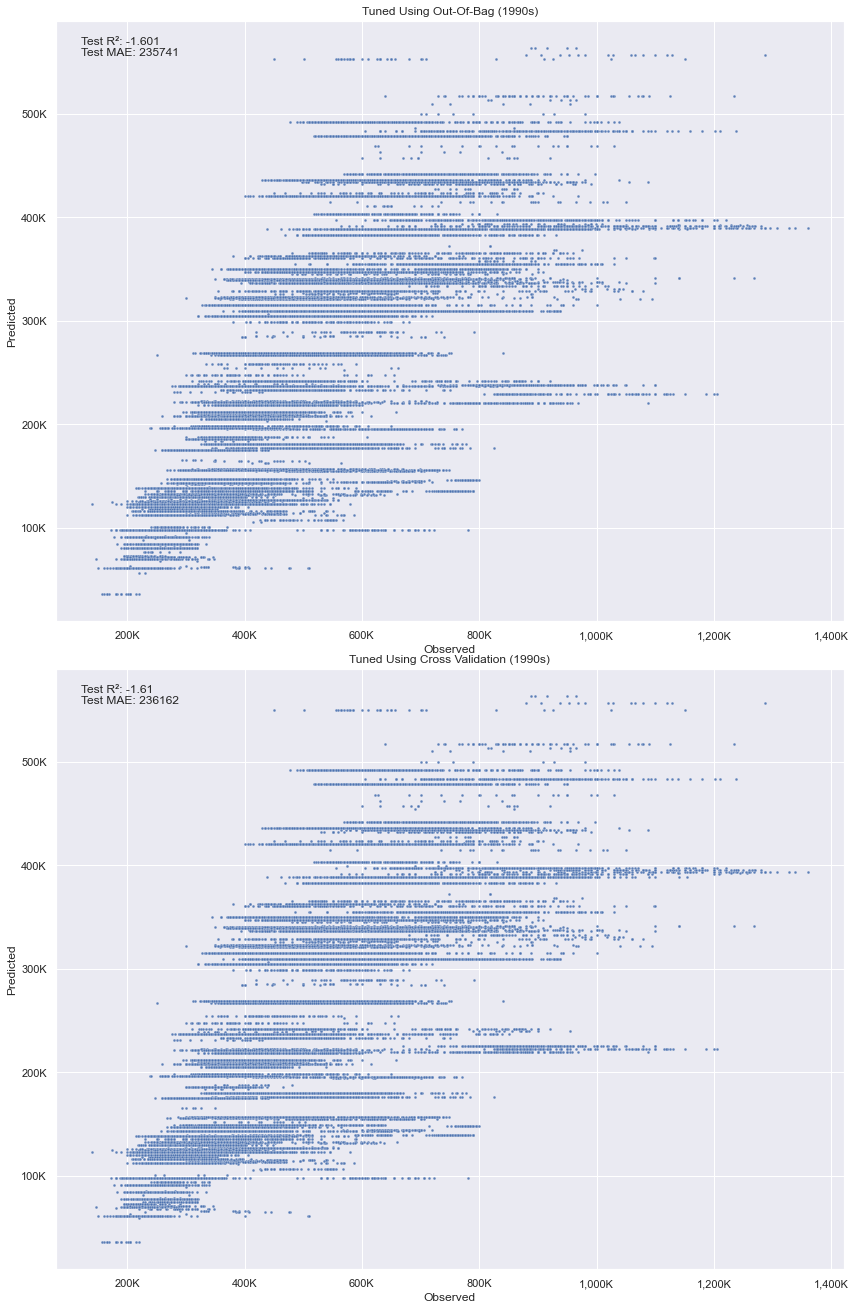

In [49]:
fig = plt.figure(figsize=(13,20))

ax1 = plt.subplot(2,1,1)
ax1 = sns.scatterplot(x=y_20['resale_price'], y=predicted_test, edgecolors='w', alpha=0.9, s=8)
ax1.set_xlabel('Observed'), ax1.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_xticks()/1000])
ax1.set_ylabel('Predicted'), ax1.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_yticks()/1000])
ax1.annotate('Test R\u00b2: ' + str(round(oob_test_score,3)) + '\nTest MAE: ' + str(round(oob_mae)), xy=(0, 1), xytext=(25, -35),
    xycoords='axes fraction', textcoords='offset points', fontsize=12)
ax1.set_title('Tuned Using Out-Of-Bag (1990s)')

ax2 = plt.subplot(2,1,2)
ax2 = sns.scatterplot(x=y_20['resale_price'], y=cv_predicted_test, edgecolors='w', alpha=0.9, s=8)
ax2.set_xlabel('Observed'), ax2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_xticks()/1000])
ax2.set_ylabel('Predicted'), ax2.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_yticks()/1000])
ax2.annotate('Test R\u00b2: ' + str(round(cv_test_score,3)) + '\nTest MAE: ' + str(round(cv_mae)), xy=(0, 1), xytext=(25, -35),
    xycoords='axes fraction', textcoords='offset points', fontsize=12)
ax2.set_title('Tuned Using Cross Validation (1990s)')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()

Text(0.5, 1.0, 'CV Feature Importance (1990s)')

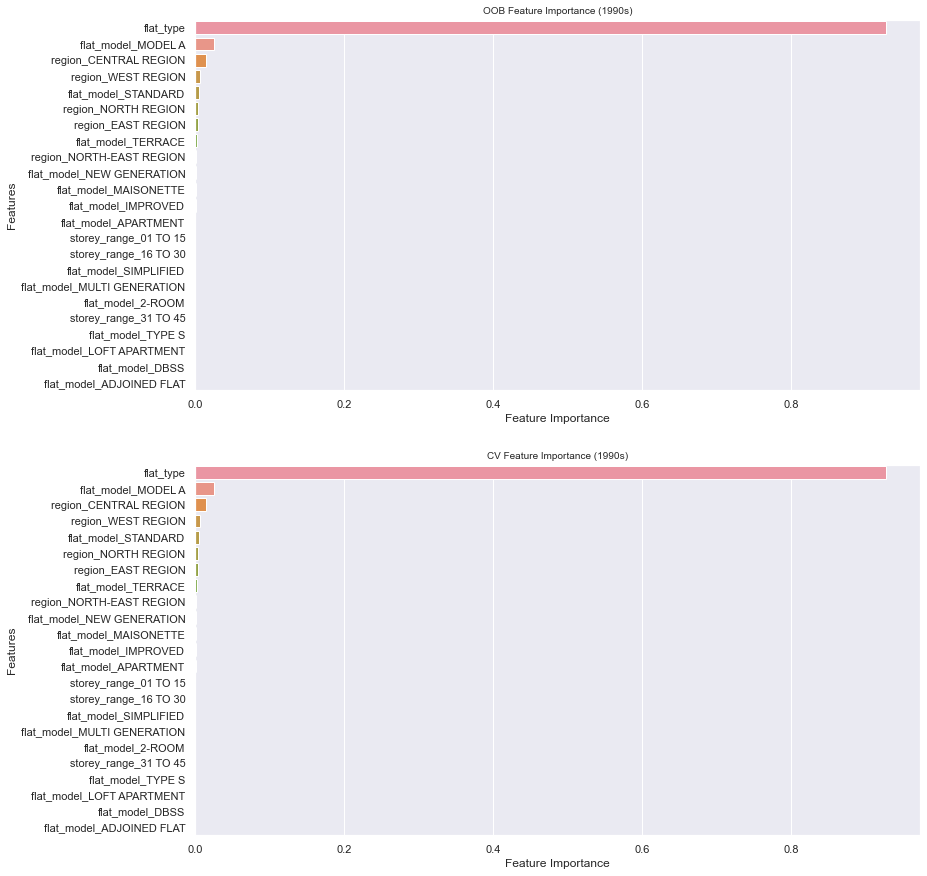

In [50]:
fig = plt.figure(figsize=(13,15))

ax1 = plt.subplot(2,1,1)
feat_imp = pd.DataFrame({'Features': X_90.columns, 'Feature Importance': rf.feature_importances_}).sort_values('Feature Importance', ascending=False)
sns.barplot(y='Features', x='Feature Importance', data=feat_imp)
#plt.xticks(rotation=45, ha='right')
ax1.set_title('OOB Feature Importance (1990s)', size=10)

ax2 = plt.subplot(2,1,2)
feat_imp = pd.DataFrame({'Features': X_90.columns, 'Feature Importance': rfr.best_estimator_.feature_importances_}).sort_values('Feature Importance', ascending=False)
sns.barplot(y='Features', x='Feature Importance', data=feat_imp)
ax2.set_title('CV Feature Importance (1990s)', size=10)

2000s

In [51]:
# Validation using out-of-bag method
rf = RandomForestRegressor(n_estimators=100,oob_score=True, random_state=0)
rf.fit(X_00,np.ravel(y_00))
predicted_train = rf.predict(X_00)

print(f'Out-of-bag R\u00b2 score estimate (2000s): {rf.oob_score_:>5.3}')


Out-of-bag R² score estimate (2000s): 0.769


In [52]:
predicted_test = rf.predict(X_20)
oob_test_score = r2_score(y_20['resale_price'], predicted_test)
spearman = spearmanr(y_20['resale_price'], predicted_test)
pearson = pearsonr(y_20['resale_price'], predicted_test)
oob_mae = mean_absolute_error(y_20['resale_price'], predicted_test)

print(f'2000s Out-of-bag')
print(f'Test data R\u00b2 score: {oob_test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')
print(f'Test data Mean Absolute Error: {round(oob_mae)}')


2000s Out-of-bag
Test data R² score: -1.05
Test data Spearman correlation: 0.833
Test data Pearson correlation: 0.816
Test data Mean Absolute Error: 208237


In [53]:
from sklearn.model_selection import GridSearchCV

# validation by k-fold cross validation with grid search for best hyperparameters
# hyperparameter values shown below are the tuned final values
param_grid = {
    'max_features': ['auto'], # max number of features considered for splitting a node
    'max_depth': [20], # max number of levels in each decision tree
    'min_samples_split': [15], # min number of data points placed in a node before the node is split
    'min_samples_leaf': [2]} # min number of data points allowed in a leaf node
rfr =GridSearchCV(RandomForestRegressor(n_estimators = 100, n_jobs=-1, random_state=0),
                        param_grid, cv=10, scoring='r2', return_train_score=True)
rfr.fit(X_00,np.ravel(y_00))
print("Best parameters set found on Cross Validation (2000s):\n\n", rfr.best_params_)
print("\nCross Validation R\u00b2 score (2000s):\n\n", rfr.best_score_.round(3))


Best parameters set found on Cross Validation (2000s):

 {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 15}

Cross Validation R² score (2000s):

 0.692


In [54]:
cv_predicted_test = rfr.predict(X_20)
cv_test_score = r2_score(y_20['resale_price'], cv_predicted_test)
spearman = spearmanr(y_20['resale_price'], cv_predicted_test)
pearson = pearsonr(y_20['resale_price'], cv_predicted_test)
cv_mae = mean_absolute_error(y_20['resale_price'], cv_predicted_test)

print(f'2000s K-fold cross validation with grid search')
print(f'Test data R\u00b2 score: {cv_test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')
print(f'Test data Mean Absolute Error: {round(cv_mae)}')


2000s K-fold cross validation with grid search
Test data R² score: -1.05
Test data Spearman correlation: 0.836
Test data Pearson correlation: 0.817
Test data Mean Absolute Error: 208073


C:\Users\Samantha\AppData\Local\Temp/ipykernel_27808/321486496.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xlabel('Observed'), ax1.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_xticks()/1000])
C:\Users\Samantha\AppData\Local\Temp/ipykernel_27808/321486496.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_ylabel('Predicted'), ax1.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_yticks()/1000])
C:\Users\Samantha\AppData\Local\Temp/ipykernel_27808/321486496.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xlabel('Observed'), ax2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_xticks()/1000])
C:\Users\Samantha\AppData\Local\Temp/ipykernel_27808/321486496.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_ylabel('Predicted'), ax2.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.

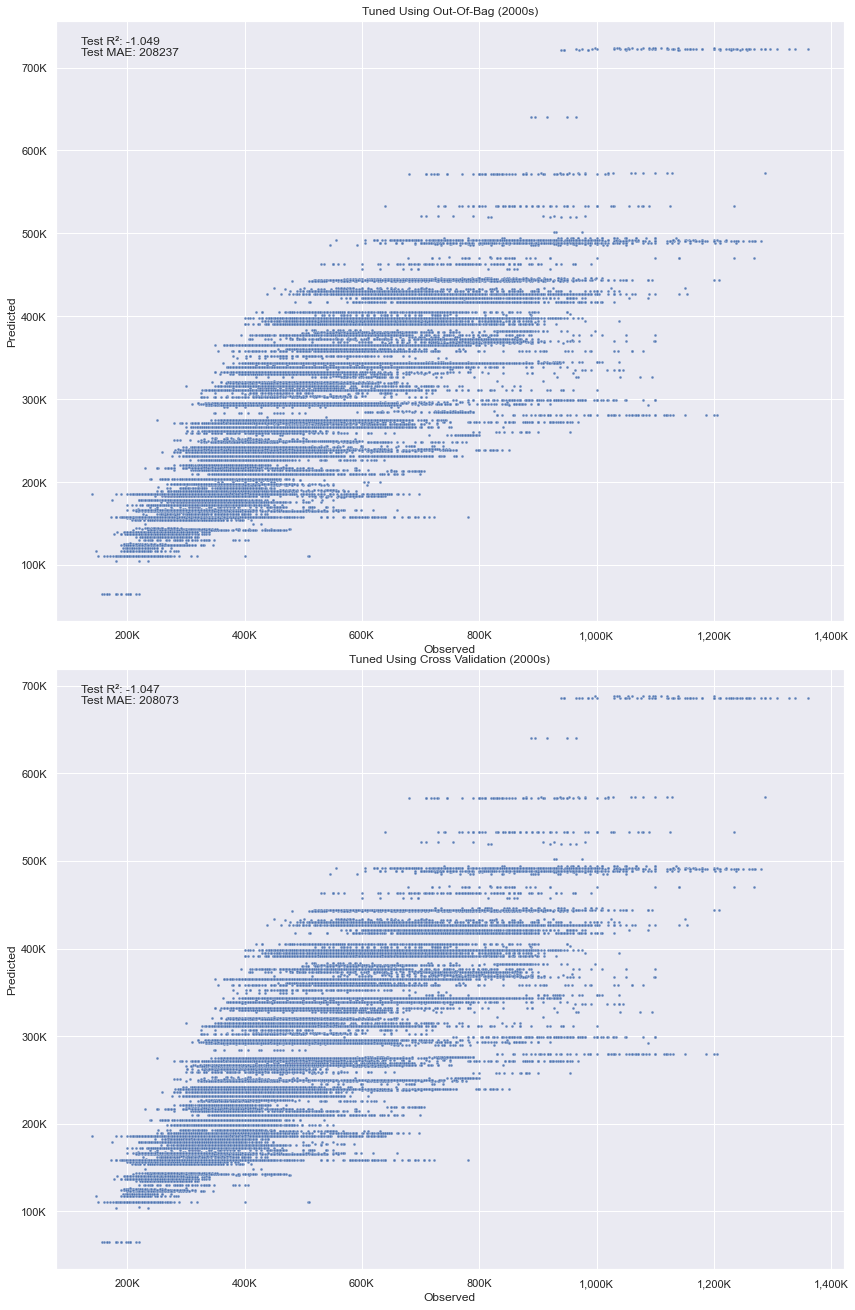

In [55]:
fig = plt.figure(figsize=(13,20))

ax1 = plt.subplot(2,1,1)
ax1 = sns.scatterplot(x=y_20['resale_price'], y=predicted_test, edgecolors='w', alpha=0.9, s=8)
ax1.set_xlabel('Observed'), ax1.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_xticks()/1000])
ax1.set_ylabel('Predicted'), ax1.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_yticks()/1000])
ax1.annotate('Test R\u00b2: ' + str(round(oob_test_score,3)) + '\nTest MAE: ' + str(round(oob_mae)), xy=(0, 1), xytext=(25, -35),
    xycoords='axes fraction', textcoords='offset points', fontsize=12)
ax1.set_title('Tuned Using Out-Of-Bag (2000s)')

ax2 = plt.subplot(2,1,2)
ax2 = sns.scatterplot(x=y_20['resale_price'], y=cv_predicted_test, edgecolors='w', alpha=0.9, s=8)
ax2.set_xlabel('Observed'), ax2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_xticks()/1000])
ax2.set_ylabel('Predicted'), ax2.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_yticks()/1000])
ax2.annotate('Test R\u00b2: ' + str(round(cv_test_score,3)) + '\nTest MAE: ' + str(round(cv_mae)), xy=(0, 1), xytext=(25, -35),
    xycoords='axes fraction', textcoords='offset points', fontsize=12)
ax2.set_title('Tuned Using Cross Validation (2000s)')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()


Text(0.5, 1.0, 'CV Feature Importance (2000s)')

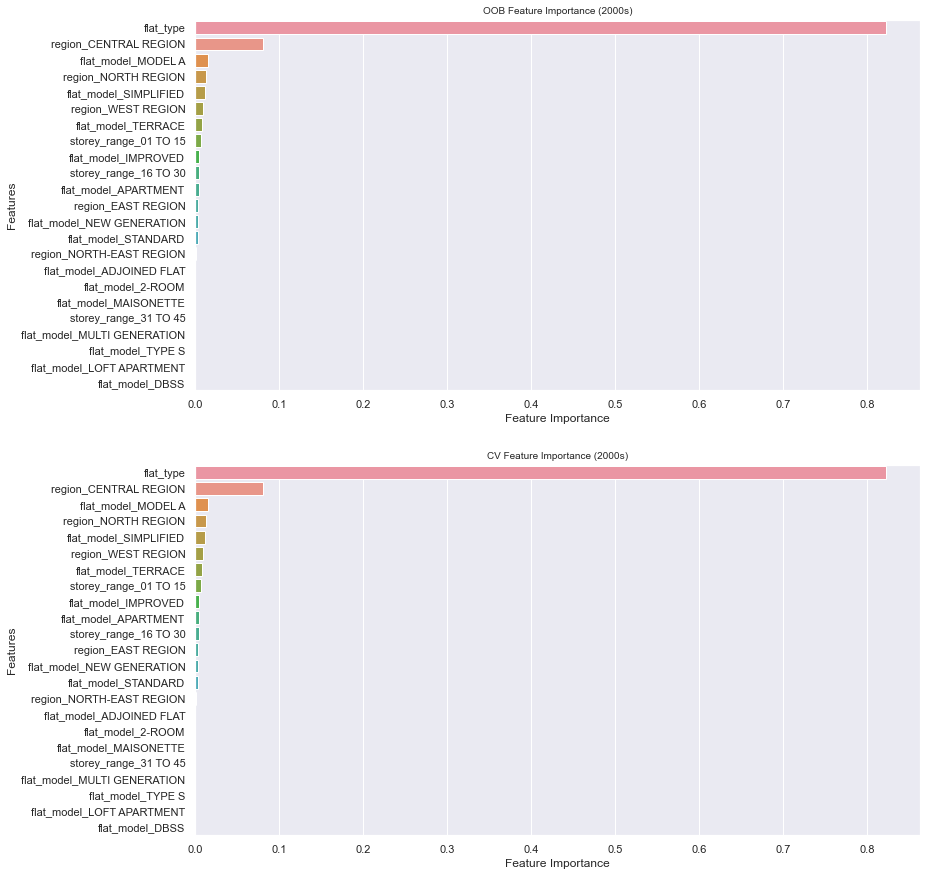

In [56]:

fig = plt.figure(figsize=(13,15))

ax1 = plt.subplot(2,1,1)
feat_imp = pd.DataFrame({'Features': X_00.columns, 'Feature Importance': rf.feature_importances_}).sort_values('Feature Importance', ascending=False)
sns.barplot(y='Features', x='Feature Importance', data=feat_imp)
#plt.xticks(rotation=45, ha='right')
ax1.set_title('OOB Feature Importance (2000s)', size=10)

ax2 = plt.subplot(2,1,2)
feat_imp = pd.DataFrame({'Features': X_00.columns, 'Feature Importance': rfr.best_estimator_.feature_importances_}).sort_values('Feature Importance', ascending=False)
sns.barplot(y='Features', x='Feature Importance', data=feat_imp)
ax2.set_title('CV Feature Importance (2000s)', size=10)



2010s

In [57]:
# Validation using out-of-bag method
rf = RandomForestRegressor(n_estimators=100,oob_score=True, random_state=0)
rf.fit(X_10,np.ravel(y_10))
predicted_train = rf.predict(X_10)

print(f'Out-of-bag R\u00b2 score estimate (2010s): {rf.oob_score_:>5.3}')


Out-of-bag R² score estimate (2010s): 0.766


In [58]:
predicted_test = rf.predict(X_20)
oob_test_score = r2_score(y_20['resale_price'], predicted_test)
spearman = spearmanr(y_20['resale_price'], predicted_test)
pearson = pearsonr(y_20['resale_price'], predicted_test)
oob_mae = mean_absolute_error(y_20['resale_price'], predicted_test)

print(f'2010s Out-of-bag')
print(f'Test data R\u00b2 score: {oob_test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')
print(f'Test data Mean Absolute Error: {round(oob_mae)}')


2010s Out-of-bag
Test data R² score: 0.701
Test data Spearman correlation: 0.87
Test data Pearson correlation: 0.876
Test data Mean Absolute Error: 64259


In [59]:
from sklearn.model_selection import GridSearchCV

# validation by k-fold cross validation with grid search for best hyperparameters
# hyperparameter values shown below are the tuned final values
param_grid = {
    'max_features': ['auto'], # max number of features considered for splitting a node
    'max_depth': [20], # max number of levels in each decision tree
    'min_samples_split': [15], # min number of data points placed in a node before the node is split
    'min_samples_leaf': [2]} # min number of data points allowed in a leaf node
rfr =GridSearchCV(RandomForestRegressor(n_estimators = 100, n_jobs=-1, random_state=0),
                        param_grid, cv=10, scoring='r2', return_train_score=True)
rfr.fit(X_10,np.ravel(y_10))
print("Best parameters set found on Cross Validation (2010s):\n\n", rfr.best_params_)
print("\nCross Validation R\u00b2 score (2010s):\n\n", rfr.best_score_.round(3))


Best parameters set found on Cross Validation (2010s):

 {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 15}

Cross Validation R² score (2010s):

 0.715


In [60]:
cv_predicted_test = rfr.predict(X_20)
cv_test_score = r2_score(y_20['resale_price'], cv_predicted_test)
spearman = spearmanr(y_20['resale_price'], cv_predicted_test)
pearson = pearsonr(y_20['resale_price'], cv_predicted_test)
cv_mae = mean_absolute_error(y_20['resale_price'], cv_predicted_test)

print(f'2010s K-fold cross validation with grid search')
print(f'Test data R\u00b2 score: {cv_test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')
print(f'Test data Mean Absolute Error: {round(cv_mae)}')


2010s K-fold cross validation with grid search
Test data R² score:   0.7
Test data Spearman correlation: 0.869
Test data Pearson correlation: 0.876
Test data Mean Absolute Error: 64407


C:\Users\Samantha\AppData\Local\Temp/ipykernel_27808/3734719727.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xlabel('Observed'), ax1.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_xticks()/1000])
C:\Users\Samantha\AppData\Local\Temp/ipykernel_27808/3734719727.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_ylabel('Predicted'), ax1.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_yticks()/1000])
C:\Users\Samantha\AppData\Local\Temp/ipykernel_27808/3734719727.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xlabel('Observed'), ax2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_xticks()/1000])
C:\Users\Samantha\AppData\Local\Temp/ipykernel_27808/3734719727.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_ylabel('Predicted'), ax2.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in 

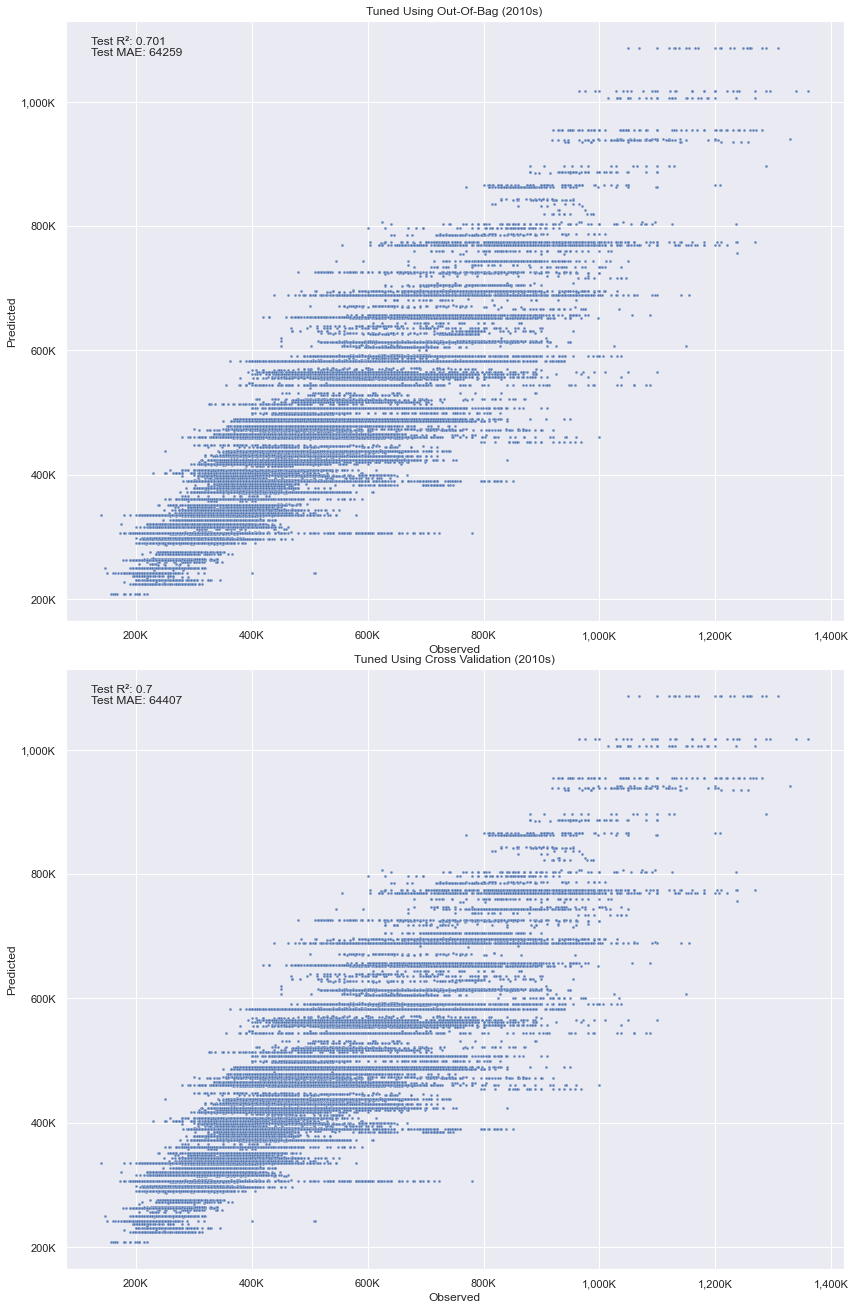

In [61]:
fig = plt.figure(figsize=(13,20))

ax1 = plt.subplot(2,1,1)
ax1 = sns.scatterplot(x=y_20['resale_price'], y=predicted_test, edgecolors='w', alpha=0.9, s=8)
ax1.set_xlabel('Observed'), ax1.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_xticks()/1000])
ax1.set_ylabel('Predicted'), ax1.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_yticks()/1000])
ax1.annotate('Test R\u00b2: ' + str(round(oob_test_score,3)) + '\nTest MAE: ' + str(round(oob_mae)), xy=(0, 1), xytext=(25, -35),
    xycoords='axes fraction', textcoords='offset points', fontsize=12)
ax1.set_title('Tuned Using Out-Of-Bag (2010s)')

ax2 = plt.subplot(2,1,2)
ax2 = sns.scatterplot(x=y_20['resale_price'], y=cv_predicted_test, edgecolors='w', alpha=0.9, s=8)
ax2.set_xlabel('Observed'), ax2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_xticks()/1000])
ax2.set_ylabel('Predicted'), ax2.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_yticks()/1000])
ax2.annotate('Test R\u00b2: ' + str(round(cv_test_score,3)) + '\nTest MAE: ' + str(round(cv_mae)), xy=(0, 1), xytext=(25, -35),
    xycoords='axes fraction', textcoords='offset points', fontsize=12)
ax2.set_title('Tuned Using Cross Validation (2010s)')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()

Text(0.5, 1.0, 'CV Feature Importance (2010s)')

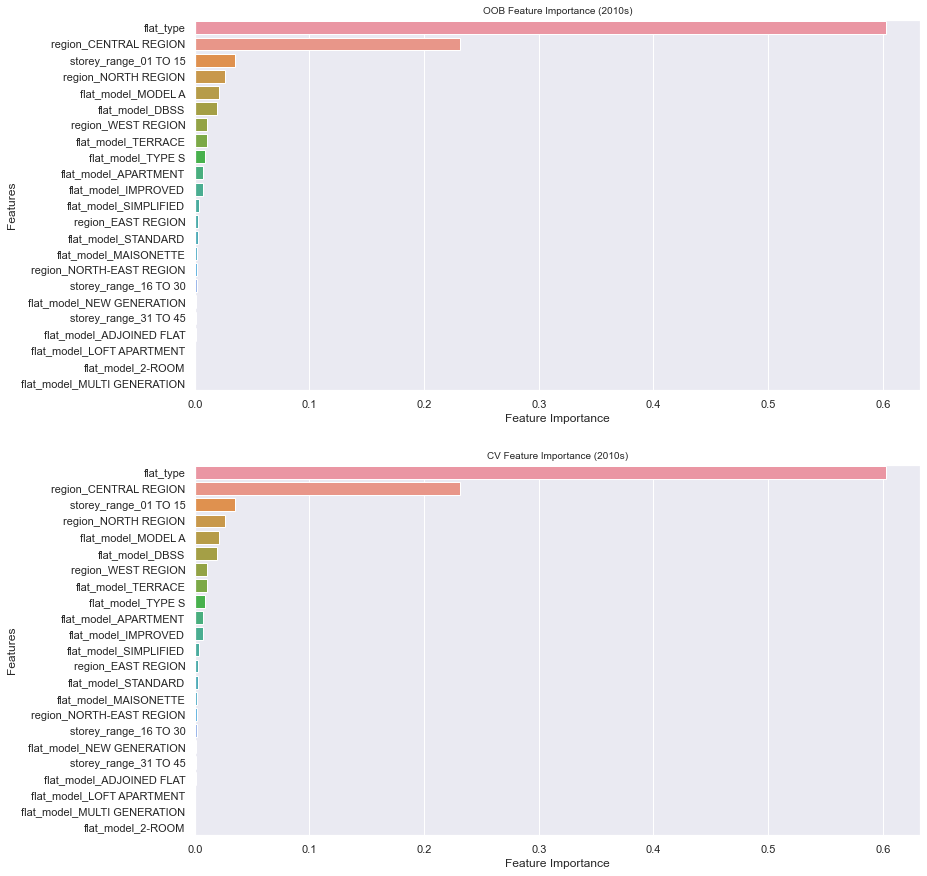

In [62]:
fig = plt.figure(figsize=(13,15))

ax1 = plt.subplot(2,1,1)
feat_imp = pd.DataFrame({'Features': X_10.columns, 'Feature Importance': rf.feature_importances_}).sort_values('Feature Importance', ascending=False)
sns.barplot(y='Features', x='Feature Importance', data=feat_imp)
#plt.xticks(rotation=45, ha='right')
ax1.set_title('OOB Feature Importance (2010s)', size=10)

ax2 = plt.subplot(2,1,2)
feat_imp = pd.DataFrame({'Features': X_10.columns, 'Feature Importance': rfr.best_estimator_.feature_importances_}).sort_values('Feature Importance', ascending=False)
sns.barplot(y='Features', x='Feature Importance', data=feat_imp)
ax2.set_title('CV Feature Importance (2010s)', size=10)